<a href="https://colab.research.google.com/github/tarun11185/Machine-Learning/blob/main/Algerian_Forest_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**


*   The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeat of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

*   Using the dataset we can clarify what are the circumstances which lead to forest fire.

*   Predection result can be used to take corrective action or prevent the mishap.










**Data Collection**

*   The dataset is collected from UCI website, provided by Center for Development of Advanced
Technologies (CDTA).
*  122 instances for each region. 


*   The period from June 2012 to September 2012.
*The dataset includes 11 attributes and 1 output attribute (class)

*   The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.







In [1]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


**Importing the dataset & Cleaning the Dataset** 

In [2]:
url ='https://raw.githubusercontent.com/tarun11185/Data/main/Algerian_forest_fires.csv'
df=pd.read_csv(url,encoding='unicode_escape',header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df[0:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


**Dataset contains the combined values for two regions, We have to segerated the regions and remove irrevelant data**

In [5]:
# Removing Unnecessary Rows from Dataset
df = df.drop(labels=[122,123],axis=0)

In [6]:
df[0:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [7]:
## Drop the index and reset the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True) # As data is related to single year 2012 we can delete year column

In [8]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**Adding Region Feature**

We have Dataset of two regions


*   Bejaia Region Dataset
*   Sidi-Bel Abbes Region Dataset

We can classify region as 0 & 1. 

*   Bejaia Region = 0
*   Sidi-Bel Abbes = 1



Sidi-Bel Abbes Region begins from 122 to last (including 122) and Bejaia Region Dataset from start to 122 (excluding 122)






In [9]:
## Creating New Feature Region 
df.loc[:122,'region']= 0
df.loc[122:,'region']= 1

In [10]:
## Checking top 5 rows
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df[:122]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0.0
118,27,09,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0.0
119,28,09,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,09,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0


In [12]:
df[122:]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [13]:
df.shape

(244, 14)

**Feature Information**


*   Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather Data observations**


*   Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
*   RH : Relative Humidity in %: 21 to 90

*   Ws :Wind speed in km/h: 6 to 29
*   Rain: total day in mm: 0 to 16.8


**Fire Weather Index (FWI) Components**



*   Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
*   Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9


*   Drought Code (DC) index from the FWI system: 7 to 220.4

*   Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
*   Buildup Index (BUI) index from the FWI system: 1.1 to 68

*   Fire Weather Index (FWI) Index: 0 to 31.1

*   Classes: two classes, namely Fire and not Fire














In [14]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

**Removing spaces from Columns**


*   There is spaces in columns head names so we need to remove them.



In [16]:
# Removing spaces from column head
df.columns =[col_name.strip() for col_name in df.columns]

In [17]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [18]:
## Classes label
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

**We have extra space in classes so we have to remove it**

In [19]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [20]:
df[df['Classes'].isnull()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [21]:
## Replace the Classes value with mode
mode_Value = df['Classes'].mode()
df['Classes'].fillna(value=mode_Value[0],inplace=True)

## Replace the FWI value with nan later will replace it with  Median after changing the dtypes
df.FWI[165] = np.nan

## Repalce the blank space in DC
df['DC']= df.DC.apply(lambda x:x.replace(" ",""))

In [22]:
df[165:167]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,fire,1.0
166,15,07,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0


In [23]:
df['Classes'] = np.where(df['Classes']=='fire',1,0)

In [24]:
# Checking the Datatypes in a Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   Temperature  244 non-null    object 
 3   RH           244 non-null    object 
 4   Ws           244 non-null    object 
 5   Rain         244 non-null    object 
 6   FFMC         244 non-null    object 
 7   DMC          244 non-null    object 
 8   DC           244 non-null    object 
 9   ISI          244 non-null    object 
 10  BUI          244 non-null    object 
 11  FWI          243 non-null    object 
 12  Classes      244 non-null    int64  
 13  region       244 non-null    float64
dtypes: float64(1), int64(1), object(12)
memory usage: 26.8+ KB


**Changing the datatypes to Numerical from**

In [25]:
df = df.astype({'day':np.int64,'month':np.int64,'Temperature':np.int64,'RH':np.int64, 
                'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64,'DMC':np.float64,
                'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,'FWI':np.float64})


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      244 non-null    int64  
 13  region       244 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 26.8 KB


In [27]:
df[165:167]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,1,1.0
166,15,7,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,1,1.0


**Fixing the Nan value in FWI**

In [28]:
# Fixing the nan value in FWI

median = df['FWI'].median()
df['FWI'].fillna(median,inplace=True)

In [29]:
df[165:167]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,4.2,1,1.0
166,15,7,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,1,1.0


In [30]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [31]:
df.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
243,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


**Shape of Dataset**

In [32]:
df.shape

(244, 14)

**We have total 244 rows and 14 columns present**

In [33]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [34]:
# Checking Null Values

df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

**There is no Null values in the Dataset**

In [35]:
df[df.duplicated()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


**There is no duplicated value in the dataset**

**Exploratary Analysis of the Features**

In [36]:
df1 = df.groupby(['Classes','region']).agg({'Classes':['count']})
df1

Classes
                 count
Classes region        
0       0.0         63
        1.0         43
1       0.0         59
        1.0         79

**For Classes**


*  0 = Not Fire
*  1 = Fire

**Region**
*   0 = Bejaia
*   1 = Sidi-Bel Abbes



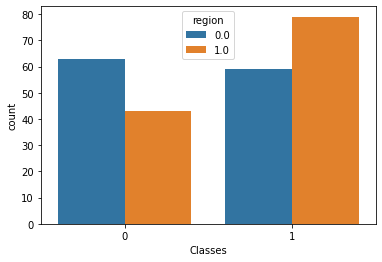

In [37]:
sns.countplot(data=df, x='Classes', hue='region');

**Remark**


*   Above graph shows that Sidi-Bel Abbes region has more occurence of fire than Bejaia region.
*   There is more occurence of fire.



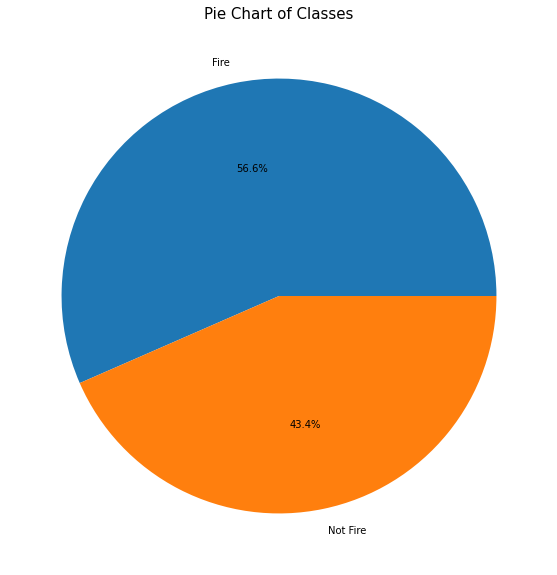

In [38]:
percentage=df.Classes.value_counts(normalize=True)*100
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

In [39]:
# Printing all the numeric column
numeric_col = [feature for feature in df.columns if feature not in ['Classes','region']]
print('We have {} numeric features :{}'.format(len(numeric_col) ,numeric_col))

We have 12 numeric features :['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


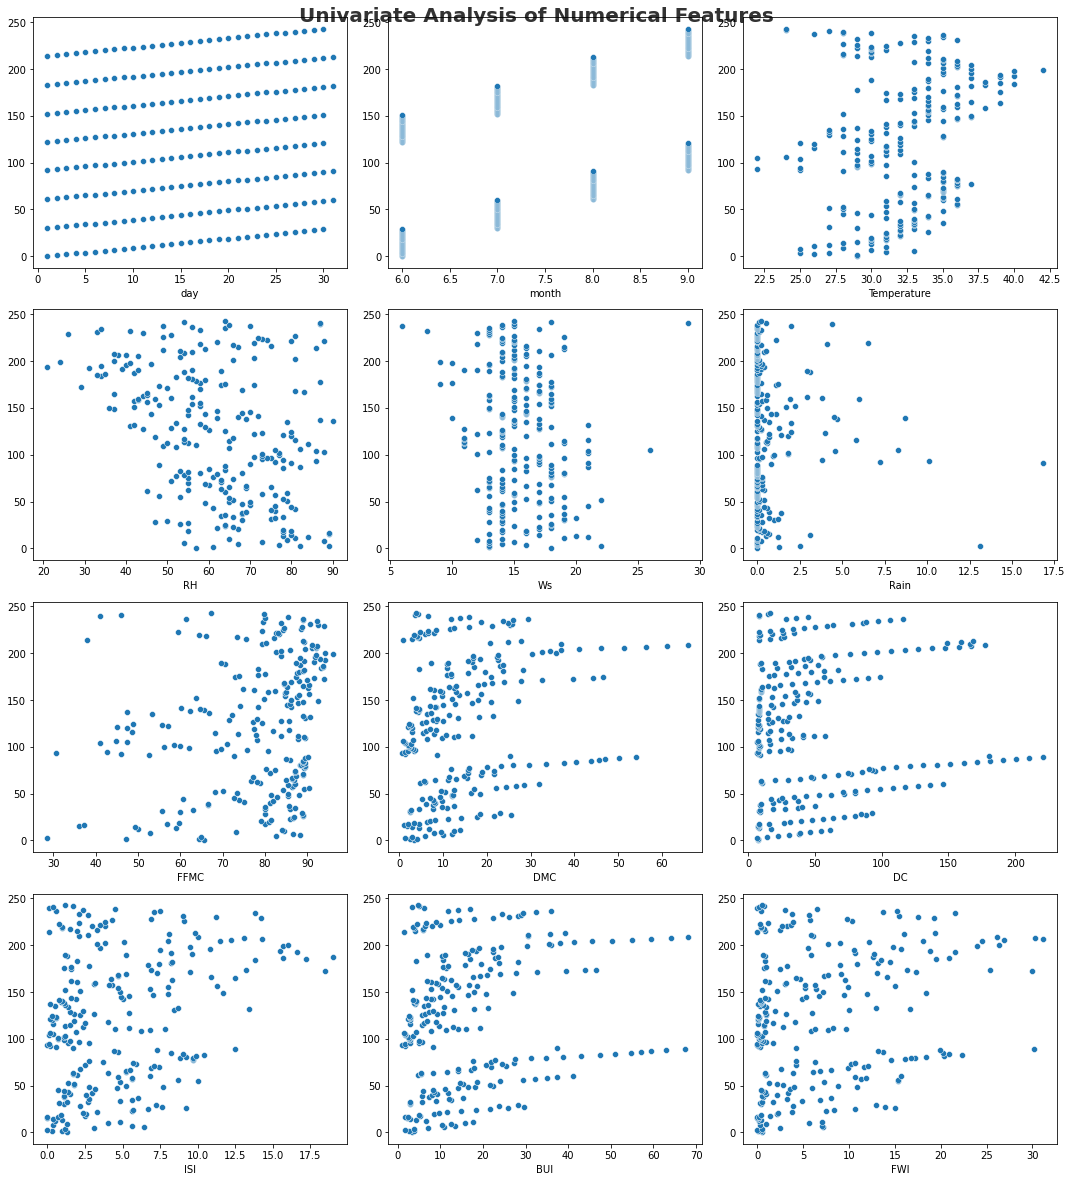

In [40]:
# Scatterplot
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=df[numeric_col[i]],y=df.index,data=df)
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

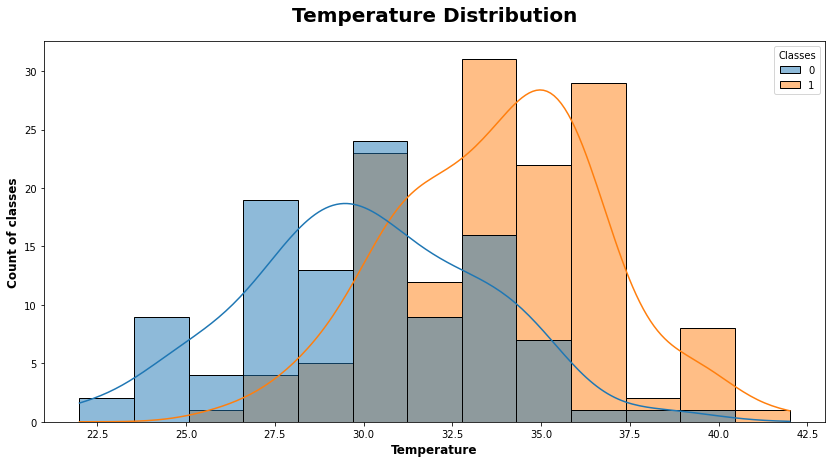

In [41]:
features = ['Temperature', 'Classes']
Temperature_df = df[features]
plt.subplots(figsize=(14,7))
sns.histplot( data=Temperature_df,x=Temperature_df['Temperature'], hue='Classes', color = 'g',kde=True)
#sns.histplot(Temperature_df.Temperature, color='g', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of classes", weight="bold", fontsize=12)
plt.xlabel("Temperature", weight="bold", fontsize=12)
plt.show()

**Above graph shows that Fire occured between 32 to 42.5 degree.**

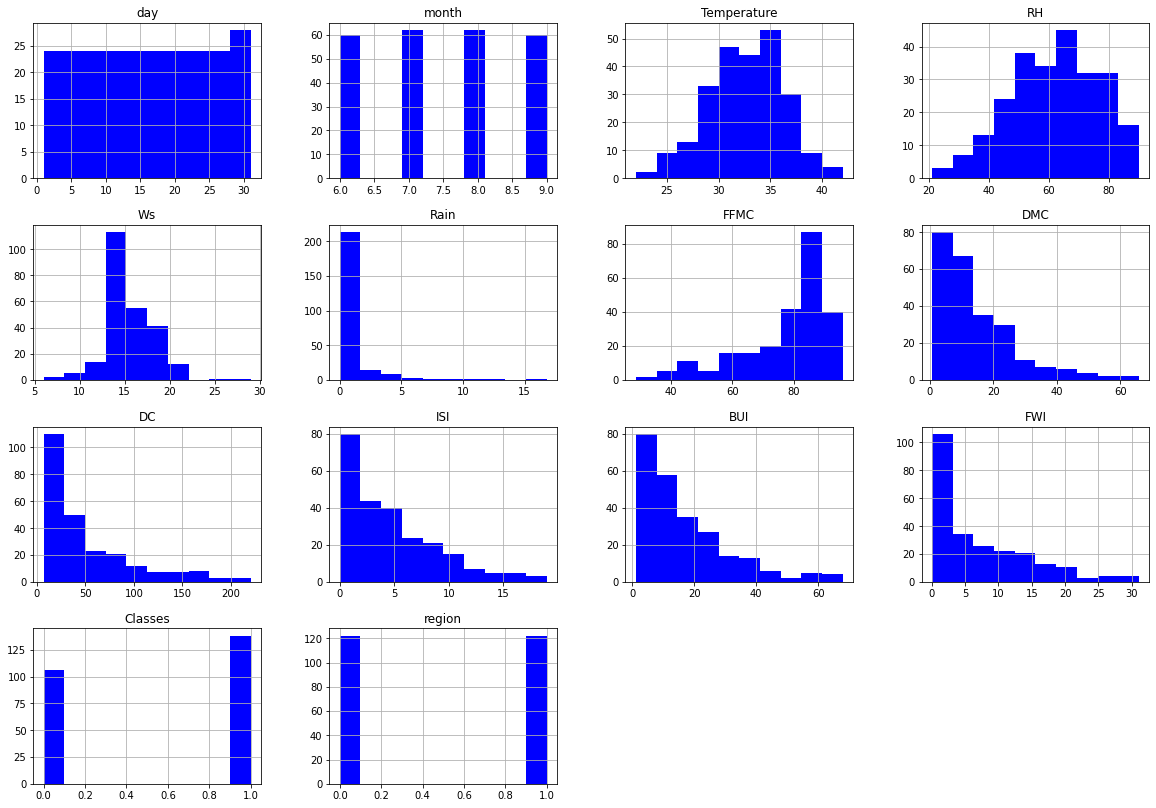

In [42]:
df.hist(figsize=(20,14),color='blue');

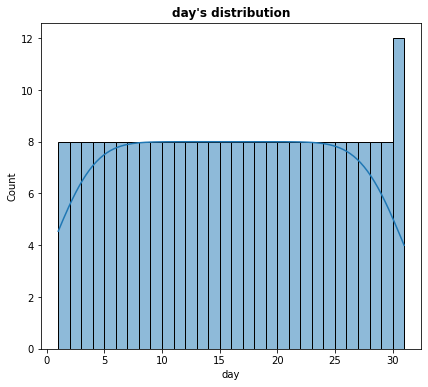

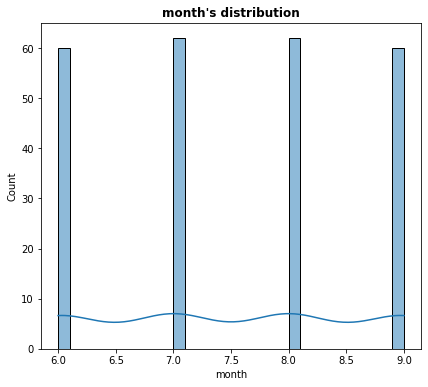

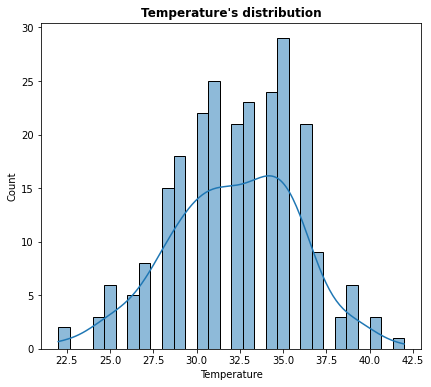

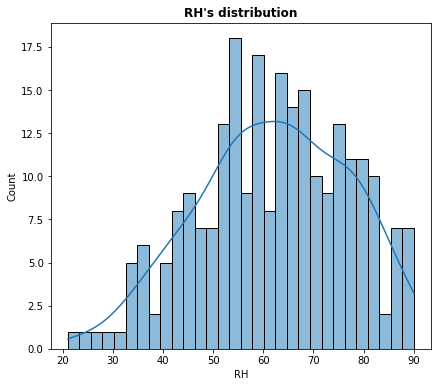

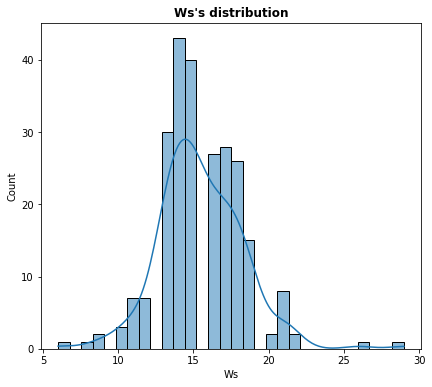

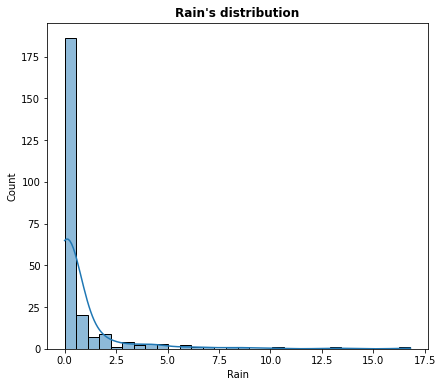

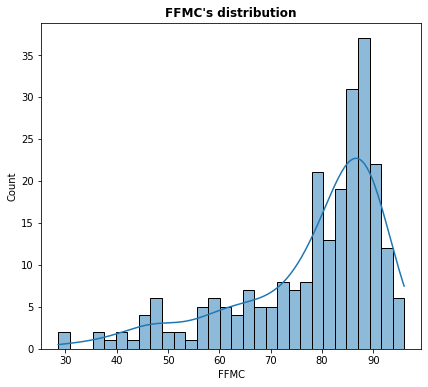

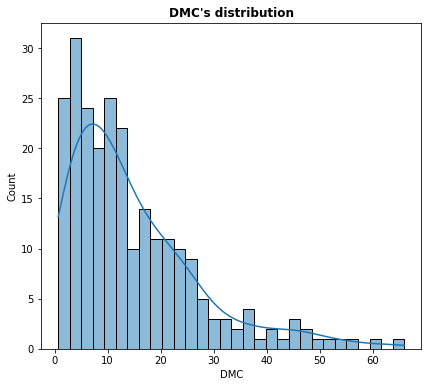

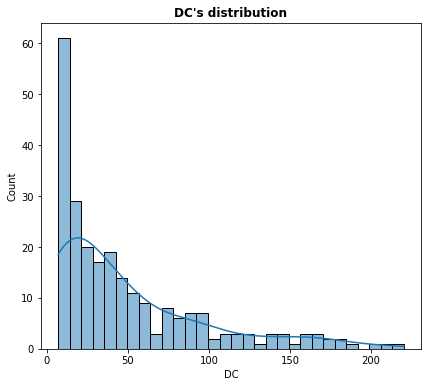

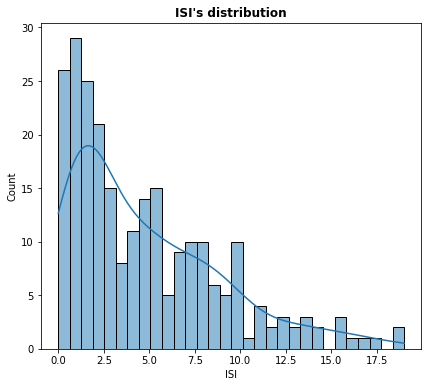

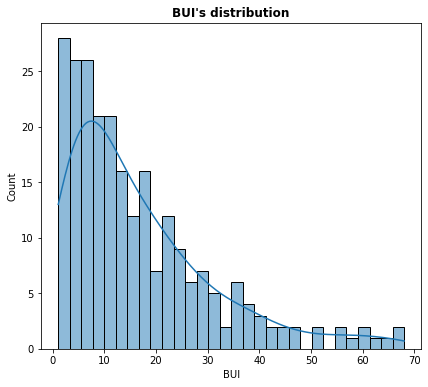

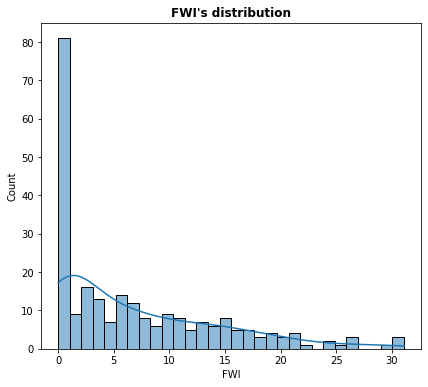

In [43]:
# Checking distribution of Numerical features
for i in numeric_col:
  plt.figure(figsize=(15,6))
  plt.subplot(121)
  sns.histplot(data=df, x=i, kde=True, bins=30)
  plt.title("{}'s distribution".format(i),fontweight="bold")

**Observations**


*   Features like Rain, DMC, DC, ISI, BUI, FWI follow log normal distribution (Right Skewed).
*   FFMC is left skewed.
*   Ws is slightly right skewed.
*   Features Rain, FMCC, DMC, ISI, FWI are having more outliers. 










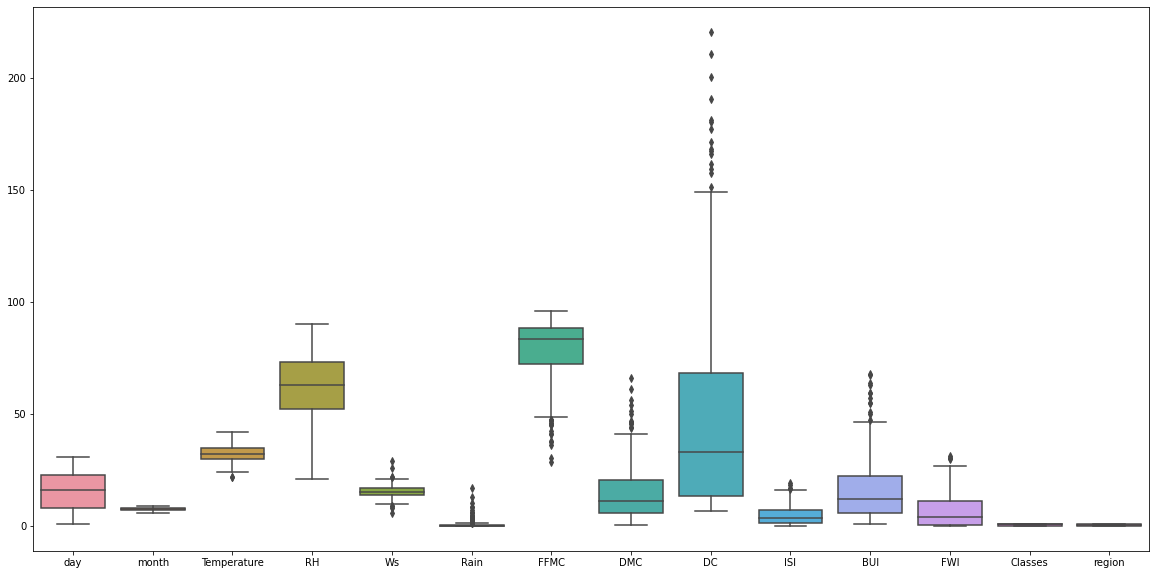

In [44]:
## Boxplot to find Outliers in the Features
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient="v");

**Observation**


*   Relative Humidity,RH does not have any outilers.
*   Temperature & FFMC have outliers in Lower boundary side.
*   Wind Speed has outliers on both sides of boundary.
*   Rain,DMC,DC,ISI,BUI & FWI have outliers in upper boundary side.





**Univariate Analysis**

*   The purpose of univariate analysis is to understand the distribution of values for a single variable.



**Bivariate Analysis**


*   Bivariate analysis helps us to find the relationship between two variables.

**Multivariate Analysis**


*   Scatterplot.
*   Pairplot.
*   Heatmap(To check correlation between feature)
*   Box plot(To check the outliers within a feature)
*   Lineplot (To check trend in numerical feature with time)
*   Strip Plot(To check relationship between Categorical Vs Numerical)









In [45]:
# Finding Correlation between Classes & Features

df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350960,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083285,0.022333,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,0.507132,-8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,0.735511,2.684206e-01


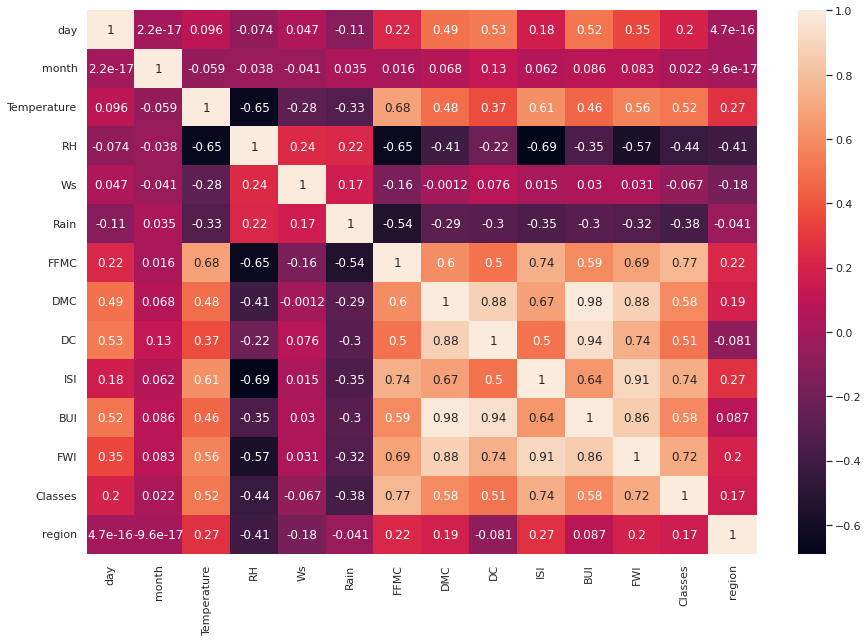

In [46]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)
plt.show();

**Insight**


*   RH is negatively corelated with Temperature,FFMC & ISI.
*   Rain is negatively correlated with Temperature, FFMC, DMC, ISI & BUI. Humidity in environment will decrease the chance of wild fire.


*   Duff moisture code & build index are very strongly correlated.
*   Drought Code & Buildup index are also strongly correlated





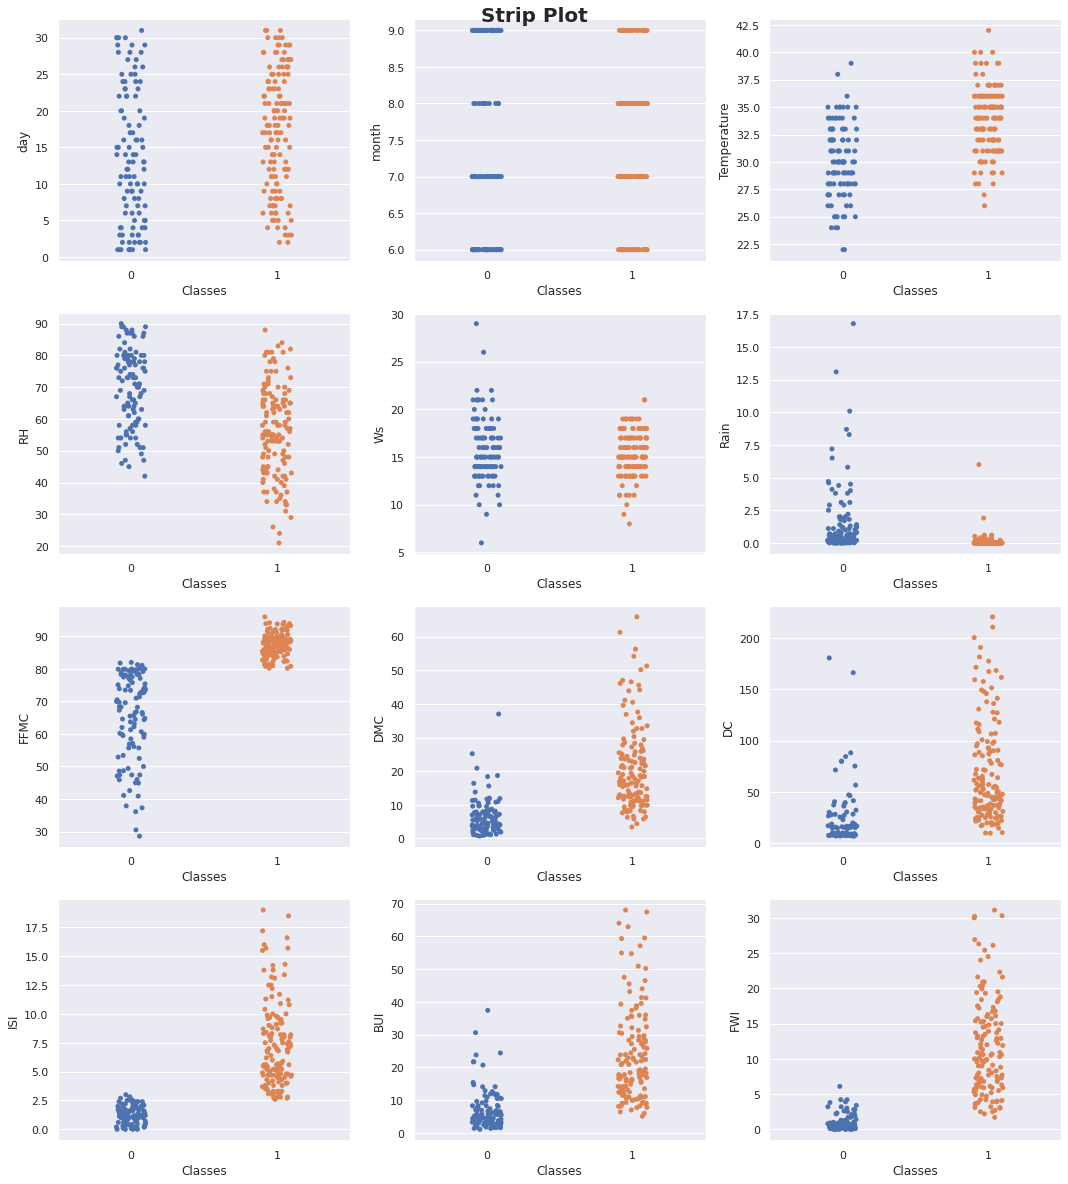

In [47]:
# Stir plot to see the relationship between numerical & Target

plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_col[i], x='Classes', data=df)
    plt.tight_layout()

**From above it is clearly showing most of the time there is more fire.**

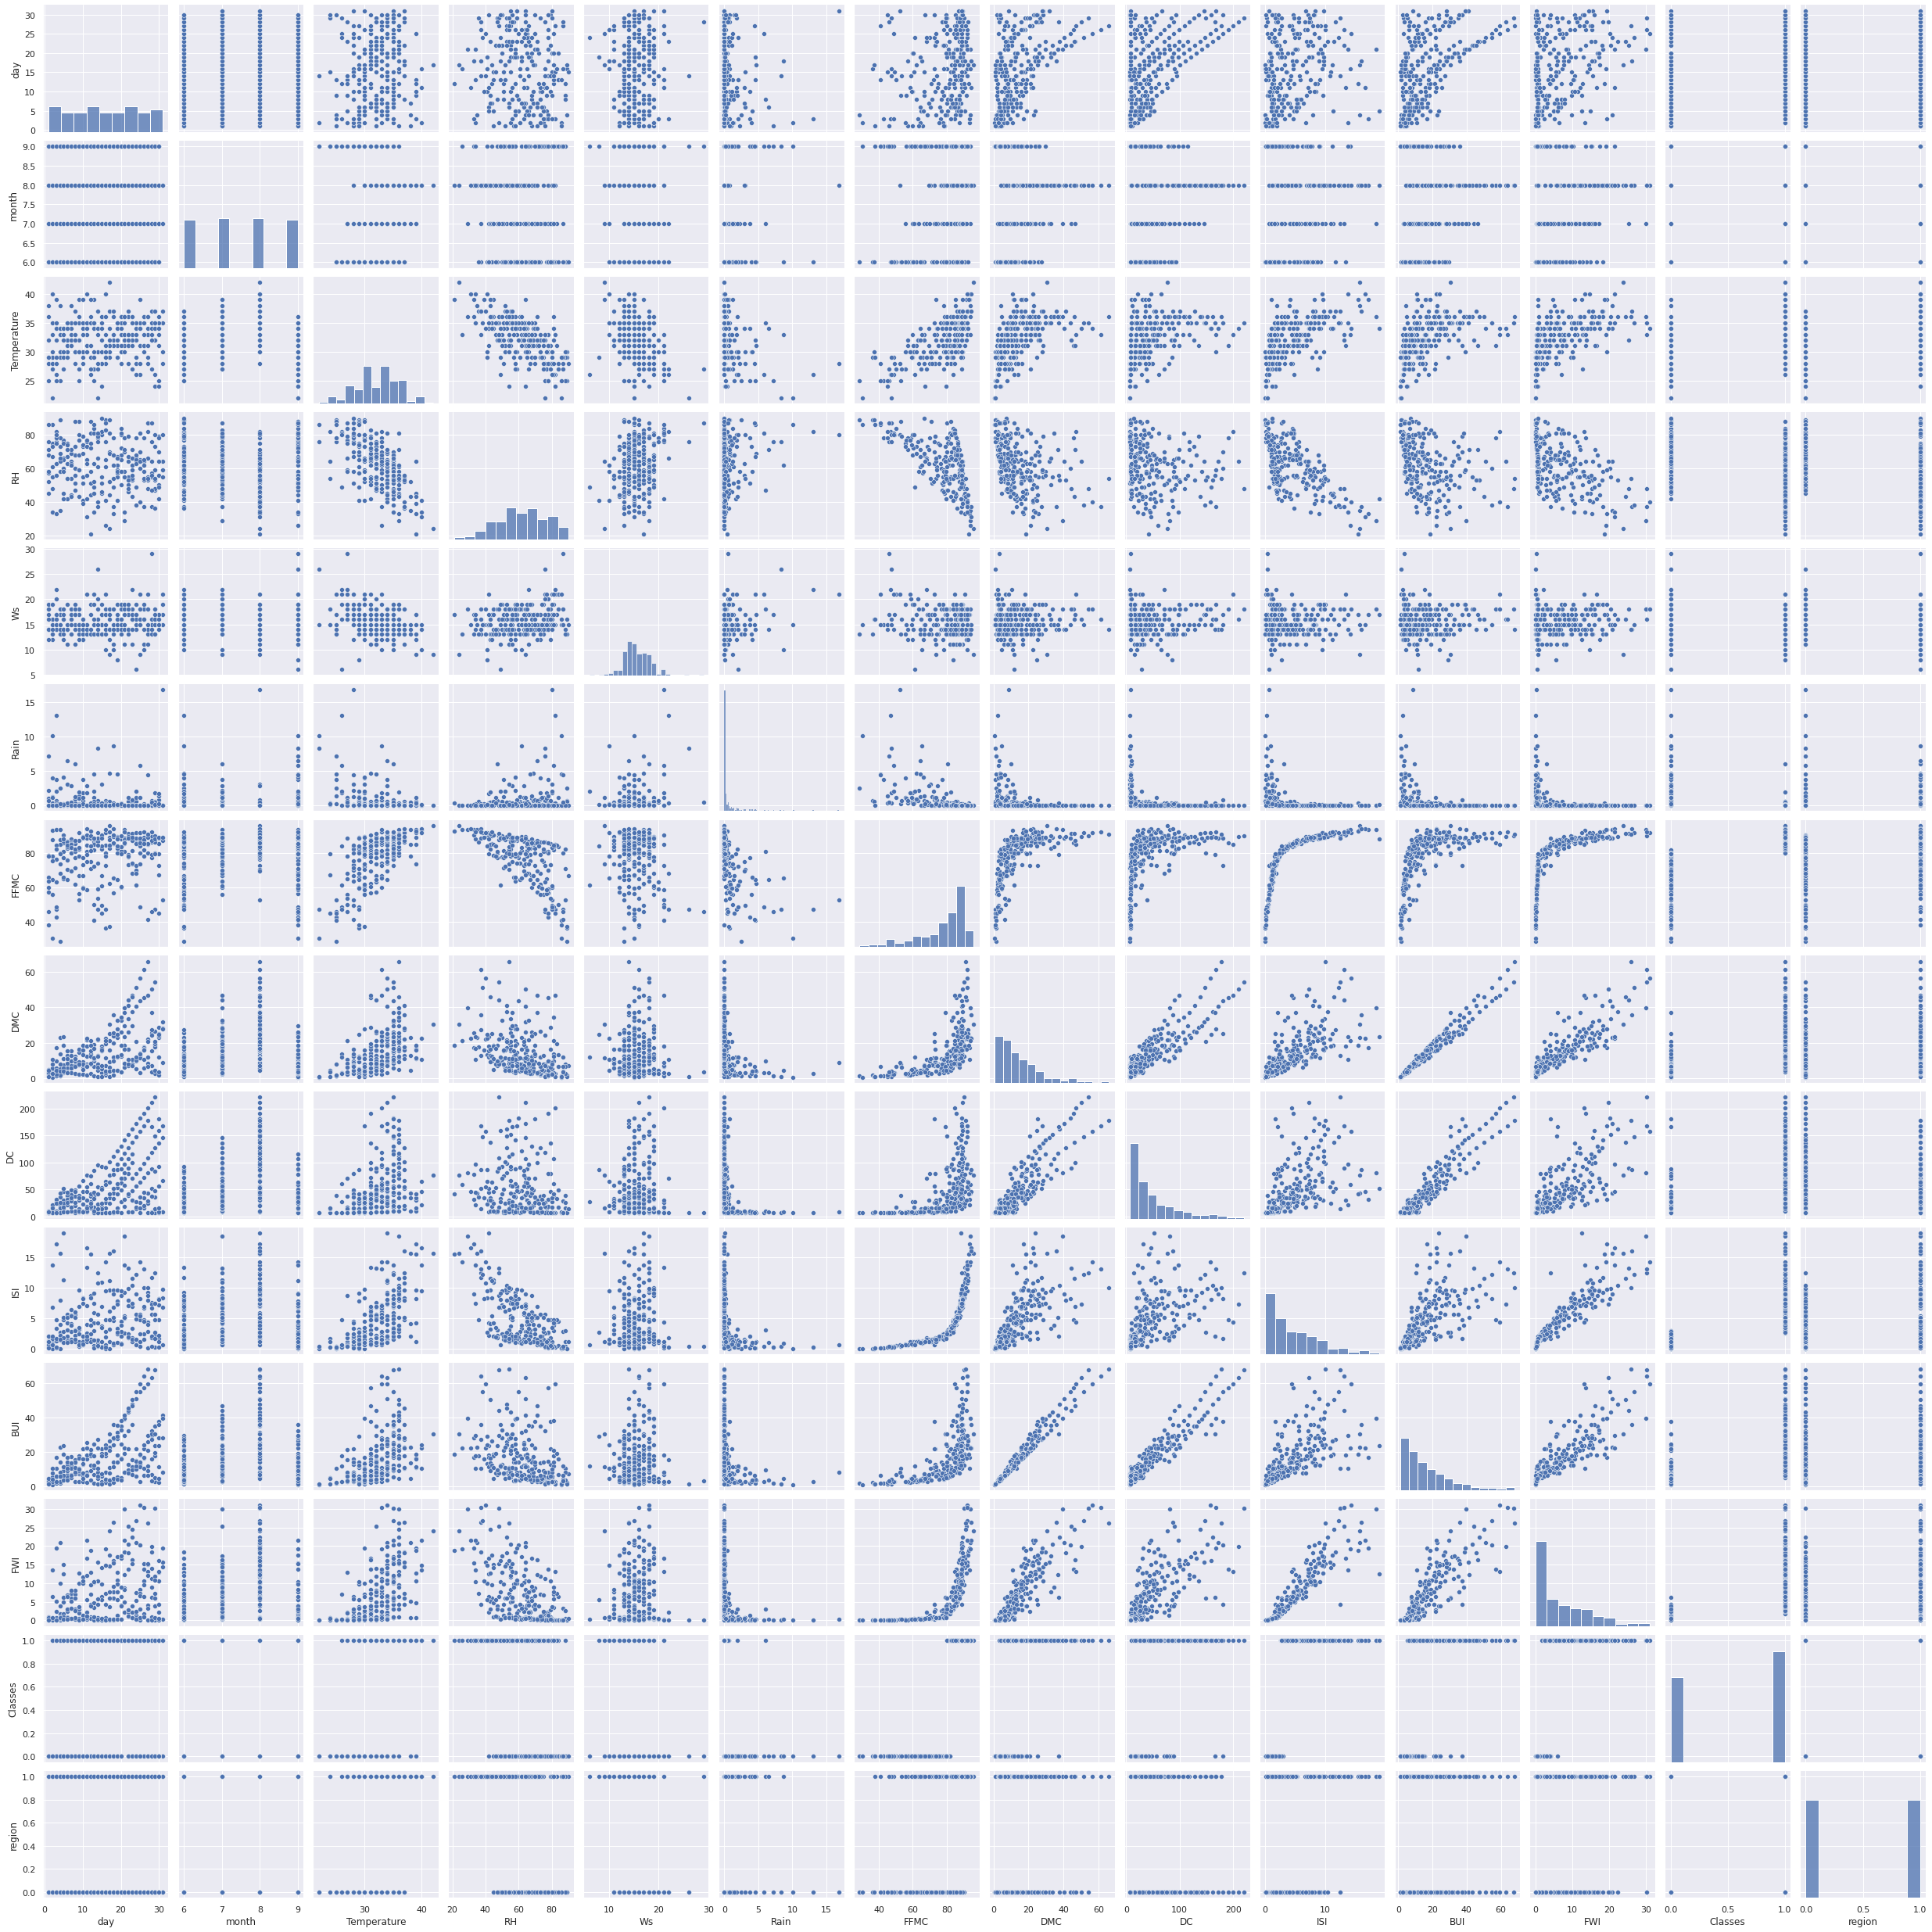

In [48]:
sns.pairplot(df);

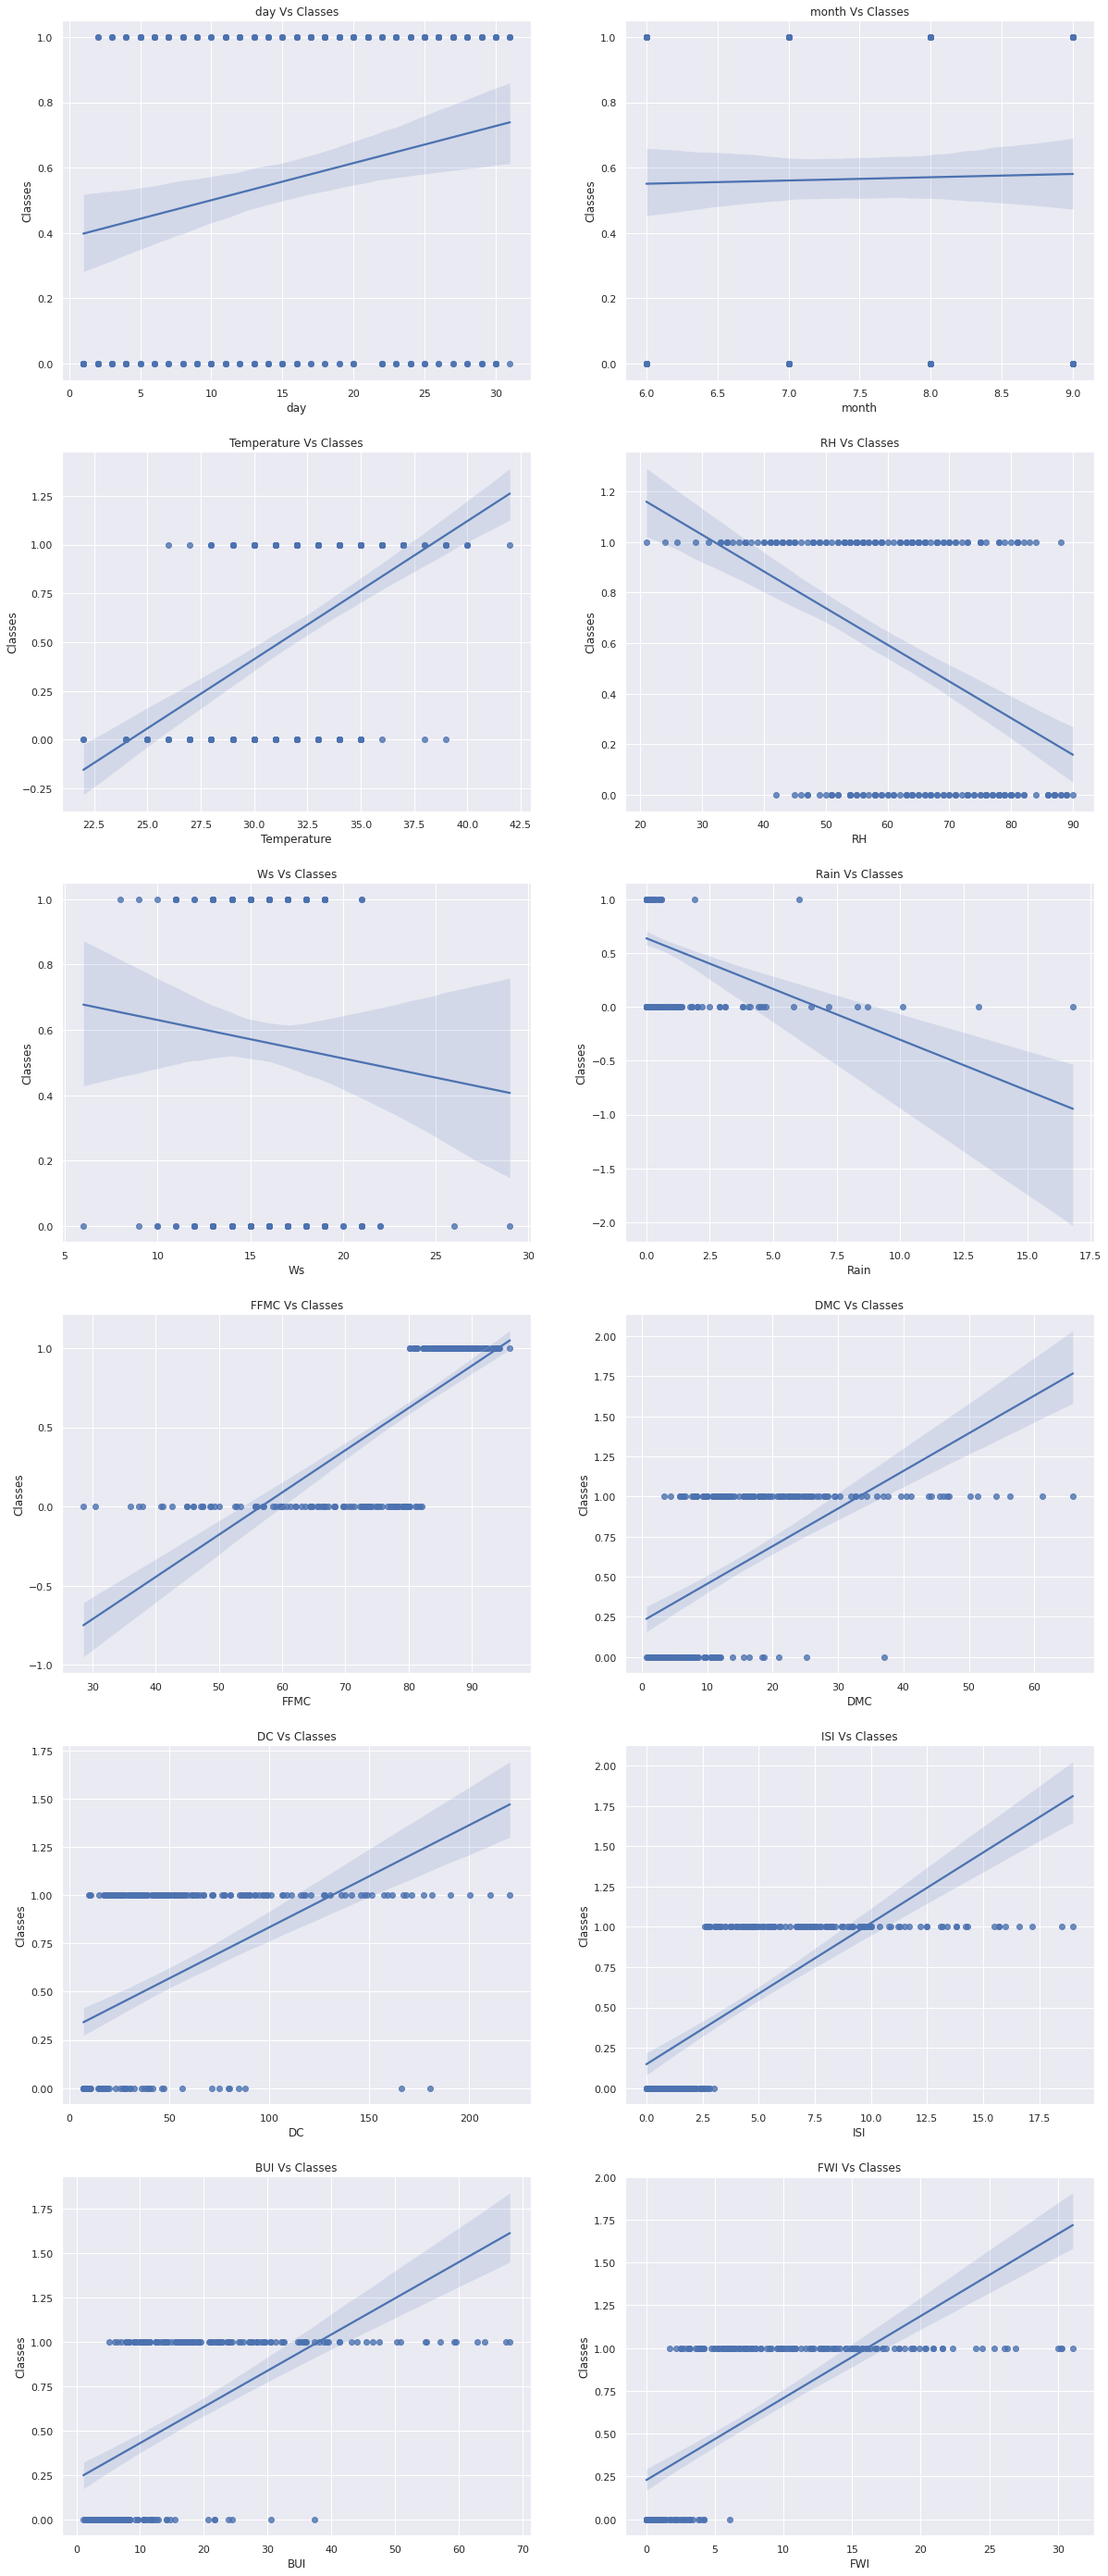

In [49]:
plt.figure(figsize=(20,50))
for i in enumerate(numeric_col):
  plt.subplot(6, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(8,10)})
  sns.regplot(data=df, x=i[1], y='Classes')
  plt.xlabel(i[1])
  plt.ylabel("Classes")
  plt.title("{} Vs Classes".format(i[1]))

**Observation**




*   Places with higher temperature has more fire.
*   Places with lower RH has fire.

*   Places wiht ffmc > 80 has fire.
*   Places wiht ISI > 2.5 has fire.

*   Places with FWI > 4 has fire.
*   Places with more rain has less fire.


# Problem No 1 -> Building Logistic Regression Model

## Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.

#### Sigmoid function 

We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:





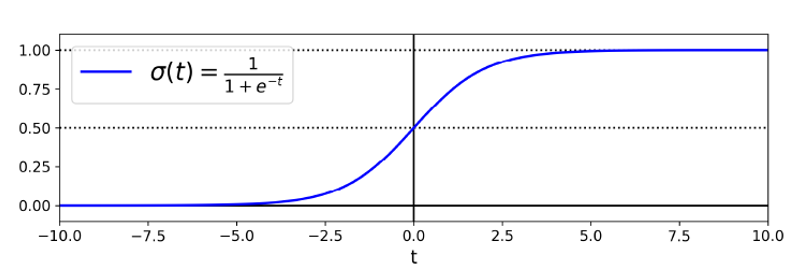

## **Model Building Using Logistic Regression**

In [50]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [51]:
# Segeragating independent features & Dependent features

X=df.drop(columns=['Classes'])
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [52]:
y=df['Classes']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

# Splitting Dataset into Training set and Test set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [54]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
216,3,9,28,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1.0
199,17,8,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1.0
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
175,24,7,33,63,17,1.1,72.8,20.9,56.6,1.6,21.7,2.5,1.0
228,15,9,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0


In [55]:
y_train.head()

216    1
199    1
156    1
175    0
228    1
Name: Classes, dtype: int64

In [56]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
72,12,8,35,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0.0
149,28,6,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,1.0
29,30,6,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,0.0
191,9,8,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1.0
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,0.0


In [57]:
y_test.head()

72     0
149    1
29     1
191    1
10     1
Name: Classes, dtype: int64

In [58]:
# Training & Test data set will be having same shape
X_train.shape, y_train.shape

((170, 13), (170,))

In [59]:
X_test.shape, y_test.shape

((74, 13), (74,))

# Feature Scaling of the dataset

In [60]:
scaler = StandardScaler()
scaler

StandardScaler()

In [61]:
# Applying fit transform to standardize the train data

X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[-1.46667507,  1.32918909, -1.20880747, ..., -0.74565569,
        -0.62490674,  0.95399809],
       [ 0.12870275,  0.44306303,  2.71075899, ...,  0.96241799,
         2.25679164,  0.95399809],
       [-1.23876395, -0.44306303,  0.47100673, ...,  0.14338266,
         1.05049929,  0.95399809],
       ...,
       [ 1.610125  ,  1.32918909, -2.04871457, ..., -0.99766657,
        -0.9465847 , -1.04822013],
       [ 1.04034721,  1.32918909, -1.20880747, ..., -0.17863123,
        -0.5578905 ,  0.95399809],
       [ 0.24265831, -0.44306303,  0.19103769, ...,  0.50739836,
         0.25970765,  0.95399809]])

Now will be using transform to avoid any data leakage. Training mean & training std will be used for standardisation when we use tranfrom

In [62]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-4.41075042e-01,  4.43063032e-01,  7.50975758e-01,
        -7.32557183e-01, -9.32937185e-01, -2.16223446e-01,
         2.27131581e-01,  6.22267177e-02,  5.59740154e-01,
        -5.58457335e-01,  2.83388695e-01, -3.97051519e-01,
        -1.04822013e+00],
       [ 1.38221389e+00, -1.32918909e+00,  1.31091382e+00,
        -1.64681313e+00, -9.32937185e-01, -3.58512423e-01,
         9.91597781e-01,  1.00182157e+00,  8.34900180e-02,
         1.54517290e+00,  7.31408021e-01,  1.50620974e+00,
         9.53998092e-01],
       [ 1.61012500e+00, -1.32918909e+00,  1.91037693e-01,
        -7.97861179e-01, -5.60638308e-01, -3.58512423e-01,
         7.32225321e-01,  6.53523476e-01,  9.31089379e-01,
         5.16223326e-01,  8.15411645e-01,  7.69031080e-01,
        -1.04822013e+00],
       [-7.82941717e-01,  4.43063032e-01,  1.87085189e+00,
        -1.25498915e+00, -1.30523606e+00, -3.58512423e-01,
         9.36993053e-01,  1.35126318e-01, -3.67583899e-01,
         1.06499643e+00, -1.76242897e

# Model : Logistic Regression

In [63]:
## Creating logistic regression object
logi_reg = LogisticRegression()
logi_reg

LogisticRegression()

In [64]:
# Pass the independent & Dependent training data to the model
logi_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [65]:
print('Intercept is :',logi_reg.intercept_)

Intercept is : [1.65529122]


In [66]:
print('Coefficient is :',logi_reg.coef_)

Coefficient is : [[-0.47660847 -0.09874215  0.26862775  0.18807009  0.03892006  0.14208192
   2.29963518 -0.38133736  0.31043667  2.23520723  0.43760737  1.82900243
   0.15527237]]


In [67]:
logi_reg_pred = logi_reg.predict(X_test_scaled)
logi_reg_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1])

# Using above model to get prediction for Training dataset

In [75]:
print('Training score:',logi_reg.score(X_train_scaled,y_train))

Training score: 0.9764705882352941


# Use above model to get prediction for Test dataset

In [76]:
print('Test score:',logi_reg.score(X_test_scaled,y_test))

Test score: 0.9594594594594594


# Evaluation of a Classification Model:
Metrics in a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values. In a classification problem, the credibility of the model is measured using the confusion matrix generated i.e, how accurately the true positive and truenegatives were predicted. The different metrics used for this purpose are given below:

*   Accuracy
*   Precision

*   Recall
*   F1 Score

*   Specifity
*   AUC(Area under the Curve)


*   ROC(Receiver Operator Characterstics)








# Confusion Matrix

A confusion matrix is an NxN matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [68]:
confusion_mat=confusion_matrix(y_test, logi_reg_pred)
confusion_mat

array([[34,  2],
       [ 1, 37]])

**Plotting Confusion Matrix**

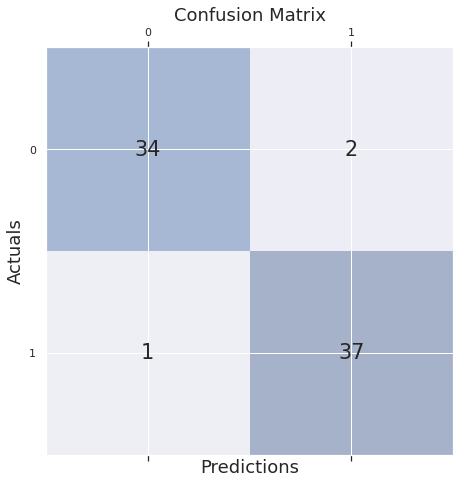

In [69]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=logi_reg_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Splitting The confusion Matrix:**

In [70]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

# Accuracy

The mathematical formula is :

Accuracy= (TP+TN)/(TP+TN+FP+FN)

It can be said that it’s defined as the total number of correct classifications divided by the total number of
classifications.

In [71]:
# Calcualtion for accuracy
Accuracy=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(Accuracy))

Accuracy of our model is 0.9595


# Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive.

Mathematically,

Precision=  TP/(TP+FP)

In [72]:
Precision = round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our Model is {}".format(Precision))

Precision of our Model is 0.9444


# Recall or Sensitivity

The mathematical formula is:

Recall= TP/(TP+FN)


As the name suggests, it is a measure of: From the total number of positive results how many positives were correctly predicted by the model. 

It shows how relevant the model is, in terms of Positive results only.

In [73]:
Recall = round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(Recall))

Recall of our model is 0.9714


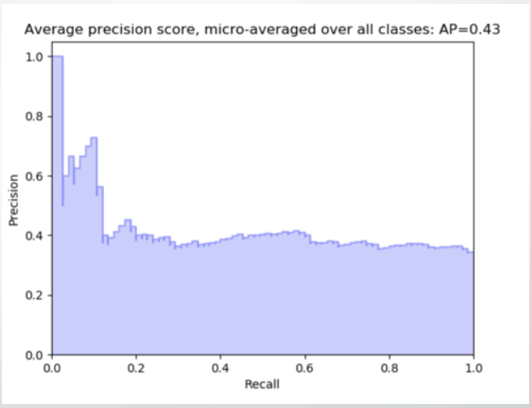

As observed from the graph with an increase in the Recall there is a drop in Precision of the model.

So what to choose : Precision or Recall 

It depends on the situation,
If we are predicting fire we need a 100% recall. But if we gonna predict person is innocent or not, then we need 100% Precision.We have to give equal importance to False positive & False Negative.

We cannot maximise both at the same time.
So we need better metric & it's called an ***F1 Score***

# F1 Score

It is clear that we need a metric that considers both Precision and Recall for
evaluating a model. One such metric is the F1 score.
F1 score is defined as the harmonic mean of Precision and Recall.

The mathematical formula is: F1 score= 2∗((Precision∗Recall)/(Precision+Recall))

In [74]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of our model is {}".format(round(F1_Score,4)))

F1_Score of our model is 0.9577


# Classification Report 

In [77]:
print("The Performance of Model for Original dataset: \n{}".format(classification_report(y_test, logi_reg_pred)))

The Performance of Model for Original dataset: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.95      0.97      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



# Problem Statemet 2 ->        Have to create Imabalanced Dataset and Apply            Logistic Regression & Check Accuracy.



In [78]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [79]:
df.shape

(244, 14)

In [80]:
# Creating Imbalance 
# Splitting the data in 90:10 precent ratio using train & test Split
X1 = pd.DataFrame(df,columns=['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])
X1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [81]:
y1 = pd.DataFrame(df,columns=['Classes'])
y1.head()

,Classes
0,0
1,0
2,0
3,0
4,0


In [82]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [83]:
# Checking the shape of train & test imbalnced dataset
X_train_imb.shape,y_train_imb.shape

((219, 13), (219, 1))

In [84]:
X_test_imb.shape,y_test_imb.shape

((25, 13), (25, 1))

Replacing all value as 1 in y_train & all values as 0 in y_test to create imbalance.

In [85]:
y_train_imb = y_train_imb.replace(0,1)

In [86]:
y_train_imb.head()

,Classes
156,1
183,1
11,1
75,1
130,1


In [87]:
y_test_imb = y_test_imb.replace(1,0)

In [88]:
y_test_imb.head()

,Classes
48,0
216,0
101,0
38,0
86,0


In [89]:
X_train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
183,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
11,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
75,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
130,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [90]:
# Combine X_train_imb & y_train_imb

train_imb = X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
183,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
11,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
75,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
130,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


In [91]:
# Combine X_test_imb & y_test_imb
test_imb = X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
48,19,7,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,0.0,0
216,3,9,28,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1.0,0
101,10,9,33,73,12,1.8,59.9,2.2,8.9,0.7,2.7,0.3,0.0,0
38,9,7,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,0.0,0
86,26,8,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,0.0,0


In [92]:
# Checking the shape of the imbalance dataset
train_imb.shape, test_imb.shape

((219, 14), (25, 14))

In [93]:
# Combining training imbalance & test imbalance to create imbalance dataset

df_imb = pd.concat([train_imb,test_imb],ignore_index=True,sort=False)
df_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


In [94]:
# Checking the shape
df_imb.shape

(244, 14)

In [95]:
# Checking if there is  for Imbalancing
df_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

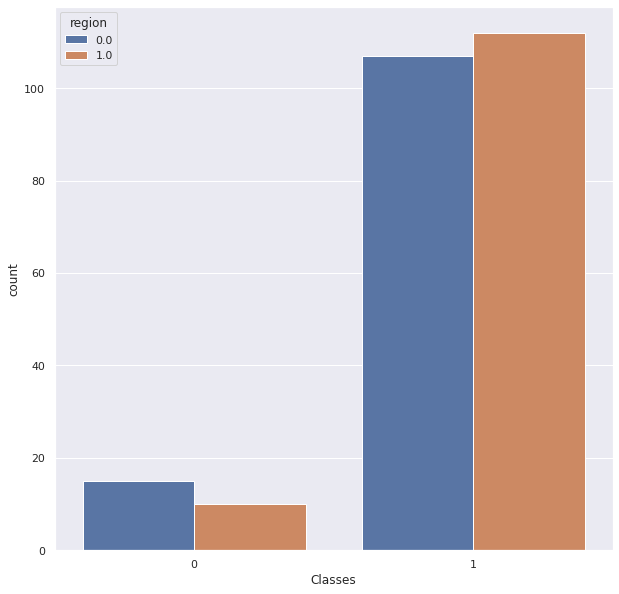

In [96]:
# 0 is for "Bejaia" & 1 is for "Sidi Bel-Abbes" Region
# 0 is for "Not Fire" & 1 is for Fire 

plt.figure(figsize=(10,10))
sns.countplot(data=df_imb,x="Classes",hue='region');

# Now Applying Logistic Regression Model on the Imbalanced Dataset.


In [97]:
# Seperating the Independent and Dependent Features

In [98]:
df_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


In [99]:
X1 = df_imb.iloc[:,:-1]
y1 = df_imb.iloc[:,-1]

In [100]:
X1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [101]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

**Now to handle Imbalanced Data by doing Upsmapling**

In [102]:
from imblearn.combine import SMOTETomek

In [103]:
smk=SMOTETomek()
smk

SMOTETomek()

In [104]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [105]:
X_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [106]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [107]:
X_bal.shape,y_bal.shape

((424, 13), (424,))

**Now Creating balanced dataset from imbalanced data**

In [108]:
data_bal = X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


# EDA on the Balanced Dataset

In [109]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          424 non-null    int64  
 1   month        424 non-null    int64  
 2   Temperature  424 non-null    int64  
 3   RH           424 non-null    int64  
 4   Ws           424 non-null    int64  
 5   Rain         424 non-null    float64
 6   FFMC         424 non-null    float64
 7   DMC          424 non-null    float64
 8   DC           424 non-null    float64
 9   ISI          424 non-null    float64
 10  BUI          424 non-null    float64
 11  FWI          424 non-null    float64
 12  region       424 non-null    float64
 13  Classes      424 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 46.5 KB


In [110]:
data_bal.describe().T

,count,mean,std,min,25%,50%,75%,max
day,424.0,14.908019,8.658672,1.0,7.000000,15.500000,22.000000,31.0
month,424.0,7.457547,1.012027,6.0,7.000000,7.000000,8.000000,9.0
Temperature,424.0,32.313679,3.326689,22.0,30.000000,32.500000,35.000000,42.0
RH,424.0,61.193396,13.721146,21.0,52.000000,62.000000,71.000000,90.0
Ws,424.0,15.554245,2.551017,6.0,14.000000,16.000000,17.000000,29.0
Rain,424.0,0.532668,1.558088,0.0,0.000000,0.005876,0.400000,16.8
FFMC,424.0,79.377583,12.513332,28.6,73.650000,84.100000,88.699402,96.0
DMC,424.0,15.596870,12.522627,0.7,5.779275,13.044425,21.425375,65.9
DC,424.0,55.643591,48.880999,6.9,15.894678,41.900000,83.490404,220.4
ISI,424.0,5.025478,3.906056,0.0,1.600000,4.113201,7.502410,19.0


In [111]:
corr_1 = data_bal.corr()
corr_1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
day,1.000000,-8.880096e-02,0.172781,-0.123240,0.098745,-0.078667,0.278336,0.580076,0.620883,0.271539,0.607686,0.442417,-0.023413,1.033558e-01
month,-0.088801,1.000000e+00,-0.101013,0.038387,0.016919,0.015312,0.025306,0.029160,0.078708,0.074070,0.042208,0.079148,0.070251,3.248349e-16
Temperature,0.172781,-1.010129e-01,1.000000,-0.680265,-0.319997,-0.282966,0.680935,0.448577,0.346329,0.658918,0.424755,0.596004,0.247832,-8.162676e-02
RH,-0.123240,3.838729e-02,-0.680265,1.000000,0.274381,0.203804,-0.626417,-0.335338,-0.191119,-0.690888,-0.288990,-0.563296,-0.410588,4.164586e-02
Ws,0.098745,1.691889e-02,-0.319997,0.274381,1.000000,0.108354,-0.105997,0.091035,0.202875,0.002518,0.137638,0.060288,-0.194430,-3.424800e-02
Rain,-0.078667,1.531169e-02,-0.282966,0.203804,0.108354,1.000000,-0.530325,-0.255826,-0.280466,-0.334092,-0.270834,-0.310352,-0.014962,2.005742e-01
FFMC,0.278336,2.530592e-02,0.680935,-0.626417,-0.105997,-0.530325,1.000000,0.598869,0.541221,0.773114,0.597739,0.726422,0.195361,-1.557340e-01
DMC,0.580076,2.916023e-02,0.448577,-0.335338,0.091035,-0.255826,0.598869,1.000000,0.895960,0.646981,0.984579,0.853535,0.126169,-1.288762e-01
DC,0.620883,7.870812e-02,0.346329,-0.191119,0.202875,-0.280466,0.541221,0.895960,1.000000,0.534017,0.953787,0.764975,-0.122324,-1.946324e-01
ISI,0.271539,7.406965e-02,0.658918,-0.690888,0.002518,-0.334092,0.773114,0.646981,0.534017,1.000000,0.626411,0.923325,0.249030,-8.801937e-02


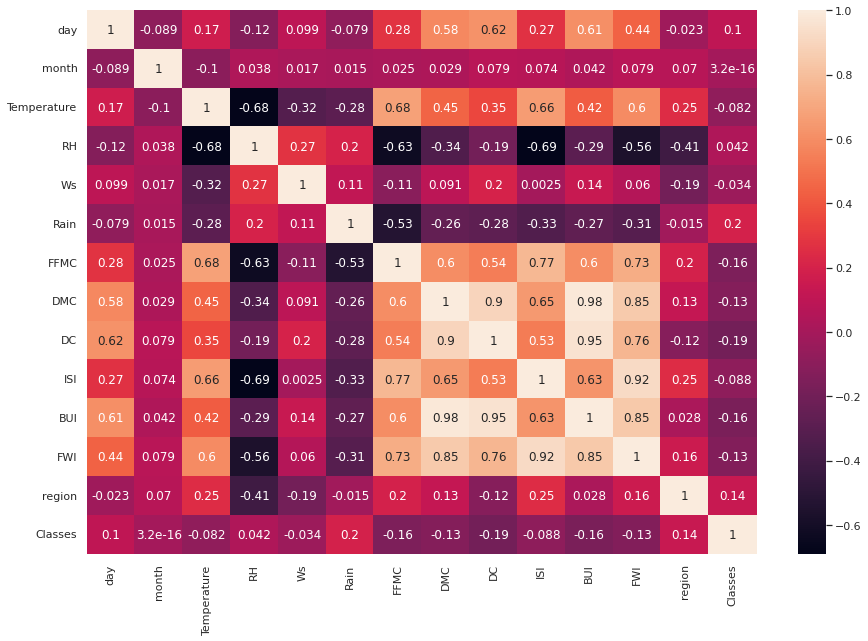

In [114]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data_bal.corr(),annot=True)
plt.show();

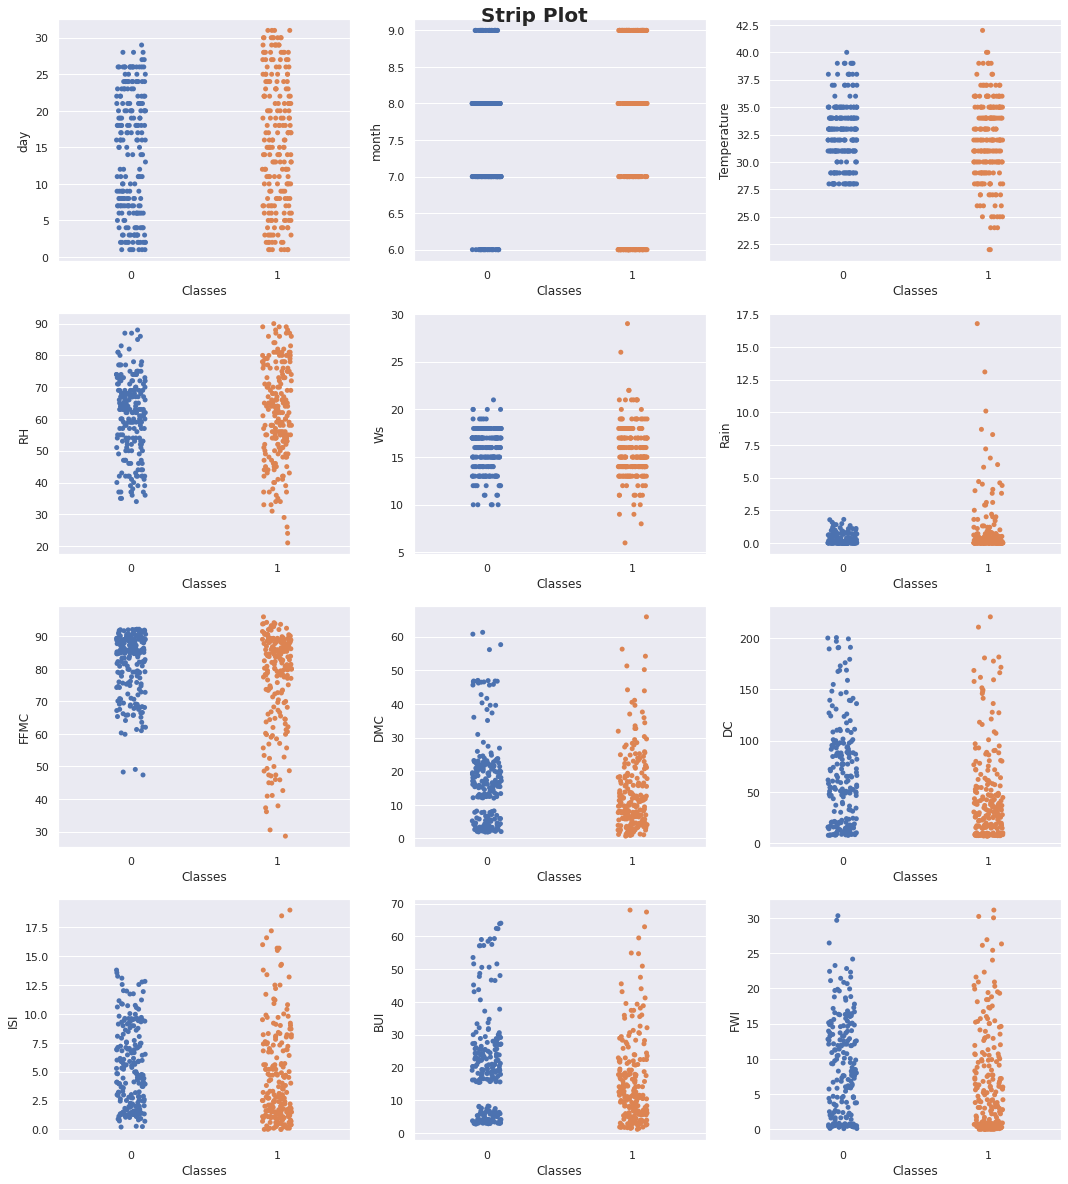

In [115]:
# Stir plot to see the relationship between numerical & Target

plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_col[i], x='Classes', data=data_bal)
    plt.tight_layout()

**Test & Train Split**

In [116]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)


In [117]:
X_train1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
12,10,6,28,79,12,0.0,73.200000,9.500000,46.300000,1.300000,12.600000,0.900000,0.0
261,2,9,28,69,17,0.0,77.824977,3.434921,19.152914,2.463599,4.713229,1.406244,1.0
7,18,9,36,33,13,0.1,90.600000,25.800000,77.800000,9.000000,28.200000,15.400000,1.0
360,19,8,35,62,18,0.0,88.699202,23.758825,123.450654,9.126620,32.087041,16.545962,0.0
202,8,8,32,60,18,0.3,77.100000,11.300000,47.000000,2.200000,14.100000,2.600000,0.0


In [118]:
y_train1.head()

12     1
261    0
7      1
360    0
202    1
Name: Classes, dtype: int64

In [119]:
X_test1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
170,23,8,36,53,16,0.0,89.500000,37.600000,161.500000,10.400000,47.500000,22.300000,0.000000
64,29,7,32,73,15,0.0,86.600000,26.700000,127.000000,5.600000,35.000000,11.900000,0.000000
252,21,7,33,59,18,0.0,87.075863,16.582152,100.783170,7.467006,23.398582,12.089725,0.000000
365,24,7,31,66,17,0.0,85.105775,21.658972,91.466493,5.364042,26.020563,9.717324,0.268592
132,30,7,31,79,15,0.0,85.400000,28.500000,136.000000,4.700000,37.400000,10.700000,0.000000


In [120]:
y_test1.head()

170    1
64     1
252    0
365    0
132    1
Name: Classes, dtype: int64

In [121]:
# Checking the shape
X_train1.shape, y_train1.shape

((296, 13), (296,))

In [122]:
# Checking the shape
X_test1.shape,y_test1.shape

((128, 13), (128,))

# Standardization /Feature Scaling of the Dataset

In [123]:
X_train1 = scaler.fit_transform(X_train1)
X_train1

array([[-0.58998419, -1.40525253, -1.23555521, ..., -0.35984885,
        -0.91863786, -0.94559343],
       [-1.52699462,  1.46340091, -1.23555521, ..., -0.91102195,
        -0.84797943,  1.23785715],
       [ 0.34702625,  1.46340091,  1.17647673, ...,  0.73036916,
         1.1051823 ,  1.23785715],
       ...,
       [-0.00435267, -1.40525253, -1.23555521, ..., -1.03075224,
        -1.0302969 , -0.94559343],
       [ 0.11277364, -0.44903472,  0.87497274, ...,  0.19337129,
         0.53023909, -0.94559343],
       [ 0.69840516, -0.44903472,  0.27196475, ...,  0.3250317 ,
         0.18399519, -0.94559343]])

In [124]:
X_test1=scaler.transform(X_test1)
X_test1

array([[ 0.93265776,  0.5071831 ,  1.17647673, ...,  2.07916453,
         2.06824155, -0.94559343],
       [ 1.63541559, -0.44903472, -0.02953924, ...,  1.2055924 ,
         0.61667398, -0.94559343],
       [ 0.69840516, -0.44903472,  0.27196475, ...,  0.39481839,
         0.64315461, -0.94559343],
       ...,
       [-0.70711049, -0.44903472, -0.02953924, ..., -0.72325485,
        -0.96051   , -0.94559343],
       [-0.23860527, -1.40525253, -1.53705921, ..., -0.77217489,
        -1.01633952, -0.94559343],
       [ 0.93265776, -1.40525253, -0.02953924, ..., -0.4367232 ,
        -0.51387383, -0.94559343]])

# Building Logistic Regression Model For Problem No 2

In [125]:
logistic_reg2 = LogisticRegression()
logistic_reg2

LogisticRegression()

In [126]:
# Passing the independent & dependent training data to Logistic regression model created above
logistic_reg2.fit(X_train1,y_train1)

LogisticRegression()

**Now will be getting the Prediction for the Test Data**

In [127]:
logistic_reg_pred2 = logistic_reg2.predict(X_test1)
logistic_reg_pred2

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

# Performance Metrics 

**Confusion Matrix**

In [128]:
confusion_mat2=confusion_matrix(y_test1, logistic_reg_pred2)
confusion_mat2

array([[44, 22],
       [28, 34]])

In [129]:
true_positive=confusion_mat2[0][0]
false_positive=confusion_mat2[0][1]
false_negative=confusion_mat2[1][0]
true_negative=confusion_mat2[1][1]

**Accuracy Score**

In [130]:
Accuracy2=round(accuracy_score(y_test1, logistic_reg_pred2),4)
Accuracy2

0.6094

In [131]:
# Calcualtion for accuracy
Accuracy_2=round(((true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)),4)
print("Accuracy of our model is {}".format(Accuracy_2))

Accuracy of our model is 0.6094


In [132]:
Precision_2=round(true_positive/(true_positive+false_positive),4)
print("Precision of our model is {}".format(Precision_2))

Precision of our model is 0.6667


In [133]:
Recall_2=round(true_positive/(true_positive+false_negative),4)
print("Recall of our model is {}".format(Recall_2))

Recall of our model is 0.6111


In [135]:
f1_score2=2*(Precision_2*Recall_2)/(Precision_2+Recall_2)
print("F-1 Score of our model is {} ".format(round(f1_score2,4)))

F-1 Score of our model is 0.6377 


In [136]:
print("The Performance of Model for Imbalanced dataset: \n{}".format(classification_report(y_test1, logistic_reg_pred2)))

The Performance of Model for Imbalanced dataset: 
              precision    recall  f1-score   support

           0       0.61      0.67      0.64        66
           1       0.61      0.55      0.58        62

    accuracy                           0.61       128
   macro avg       0.61      0.61      0.61       128
weighted avg       0.61      0.61      0.61       128



# Observation



*   After creating Imbalanced dataset purposely and trying to balanced the dataset, Surely it degrades the model.
*   It decreases the performance of the model.

